# Spike Challenge

*Objective:* Predict the price of milk given macroeconomic and weather variables. 

By Daniela A. Gómez Cravioto


## Libraries

In this section we import the libraries that will be used for the data analysis.

In [90]:
# pandas data frames
import pandas as pd

#datetime format
import datetime

#multidimensional arrays
import numpy as np
np.random.seed(123)

#visualizations
import seaborn as sns 
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,8
rcParams['figure.dpi'] = 100
plt.style.use('fivethirtyeight')
bit = dict(markerfacecolor = 'b', marker = 'p')
#statistics 
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import winsorize
from scipy.stats import shapiro

## Data

The datasets are imported.

In [2]:
missing_values = ['','a']
varClim = pd.read_csv('Data/precipitaciones.csv') #precipitaciones por region
varMacr = pd.read_csv('Data/banco_central.csv', na_values=missing_values) #variables macroeconomicas
precios  = pd.read_csv('Data/precio_leche.csv') #variable dependiente

## Cleansing and Exploratory Data Analysis

In [3]:
varClim.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [4]:
varMacr.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [5]:
precios.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [6]:
varMacr.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


As can be observed from the previous table, not all features appear in the description. Hence, it will need to check the data type and change it accordingly

In [7]:
varClim.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [8]:
precios.describe()

,Anio,Precio_leche
count,506.000000,506.000000
mean,1999.584980,114.444980
std,12.183973,78.999882
min,1979.000000,3.850000
25%,1989.000000,48.162500
50%,2000.000000,102.250000
75%,2010.000000,189.175000
max,2021.000000,318.880000


The output variable (Precio_leche) has a mean of 114.4450 and a standard deviation of 78.9999, indicating high variance. Additionally, the maximum price of 318.88, is 2.5878 times more than the standard deviation, which indicates a positive skeweness. The distribution can be better explored with boxplots and distributions plots. 

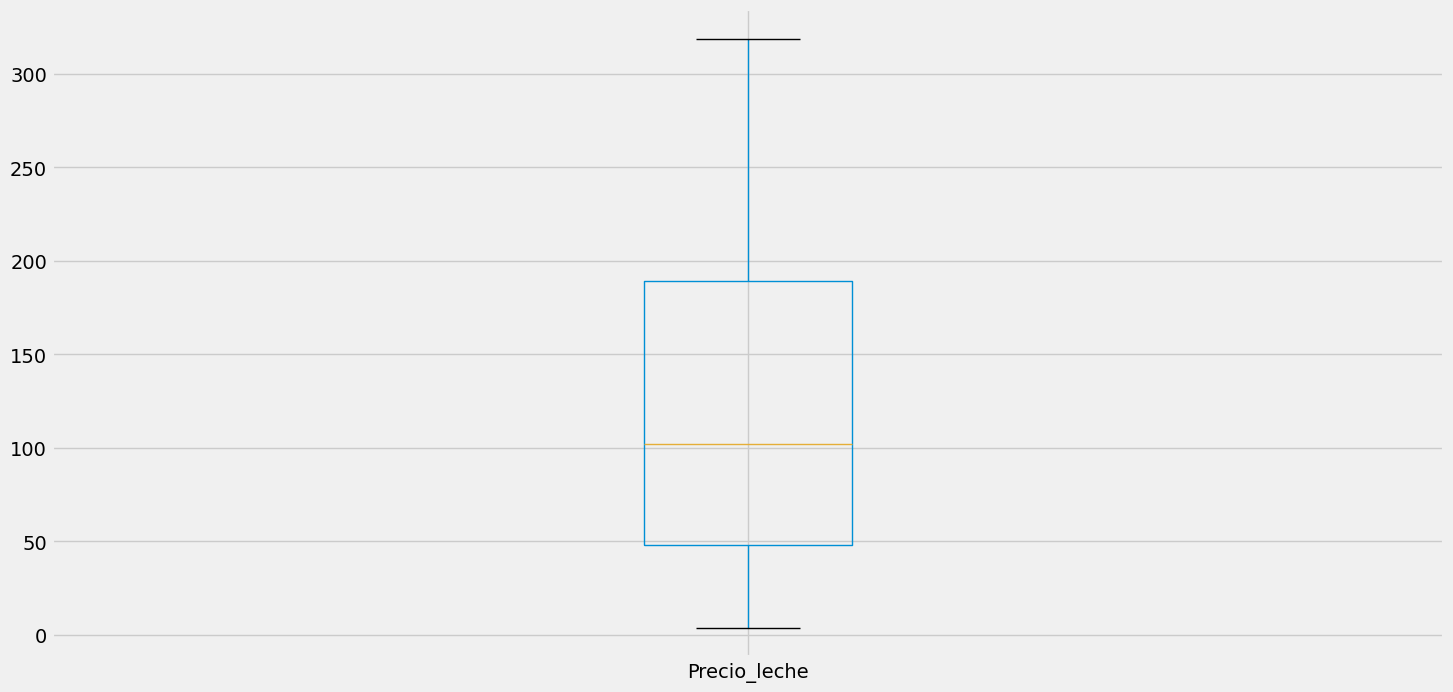

In [88]:
precios.boxplot('Precio_leche', flierprops = bit)

The boxplot shows a departure from symmetry  and a higher amount of data in the upper fourth. The data stretches out more to the higher end . The box itself is wide, indicating a fair amount of variability. Finally, the upper whisker is long showing higher extreme values in the higher end. 

/Users/dannygc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


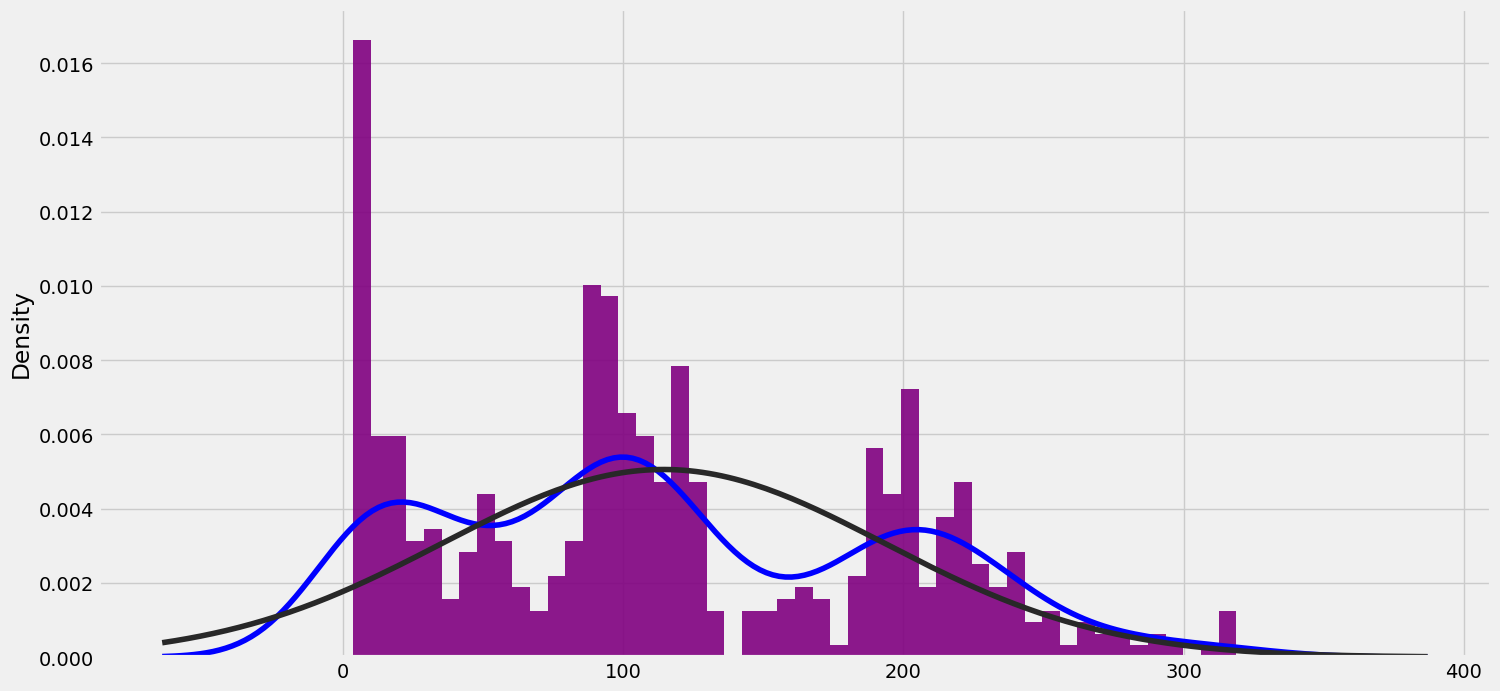

In [10]:
sns.distplot(x = precios['Precio_leche'], fit = norm, kde = True, bins = 50, color = 'b', hist_kws = {'color':'purple', 'alpha':0.9})

The density plot gives higher insigh into the distribution of the target variable, milk's prices. At first sight we can observe a multimodal distribution, showing three peaks of data, one close to 20, another around 100 and a third one around 200. This indicates there are three different groups in the prices data. We can see also that using parametric models would require a transformation of this variable as the data does not seem to have a normal distribution. 

### Dates Standarization

In [11]:
varClim.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [12]:
varMacr.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [13]:
col_change = varMacr.loc[:,((varMacr.dtypes == 'O')&(varMacr.columns.values != 'Periodo'))].columns.values

def eliminate(x):
    if pd.isnull(x) == True:
        return np.nan
    elif len(x.split('.')) < 3:
        if len(x.split('.')) > 1:
            return float(x.split('.')[0]+'.'+x.split('.')[1])
        else:
            return float(x)
    else:
        return float(x.split('.')[0]+'.'+x.split('.')[1]+x.split('.')[2])

for col in col_change:
    varMacr[col] = varMacr.apply(lambda row: eliminate(row[col]), axis=1)

In [14]:
precios.dtypes

Anio              int64
Mes              object
Precio_leche    float64
dtype: object

In [15]:
varClim['date'] = varClim['date'].apply(pd.to_datetime)
varClim['date']

0     1989-02-01
1     1998-10-01
2     2001-02-01
3     2008-11-01
4     2009-04-01
         ...    
491   1988-10-01
492   2019-08-01
493   2015-06-01
494   2016-09-01
495   1982-04-01
Name: date, Length: 496, dtype: datetime64[ns]

In [16]:
varClim.rename(columns = {'date': 'Date'},inplace = True)

In [17]:
#varMacr['Periodo']  = pd.to_datetime(varMacr['Periodo'], errors = 'raise', dayfirst=False, yearfirst=True)

It seems like the months are out of bounds. There is a month that has a 13 value. Since this row has not much information, we will drop it.

In [18]:
varMacr.loc[varMacr['Periodo'] == '2020-13-01 00:00:00 UTC']


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
89,2020-13-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,803.222345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893.234345,NaN


In [19]:
varMacr = varMacr[varMacr['Periodo'] != '2020-13-01 00:00:00 UTC']

In [20]:
varMacr['Periodo']  = pd.to_datetime(varMacr['Periodo'], errors = 'raise', dayfirst=False, yearfirst=True,utc = False)
varMacr['Periodo'] = varMacr['Periodo'].dt.tz_localize(None)

In [21]:
varMacr.rename(columns = {'Periodo': 'Date'},inplace = True)

In [22]:
precios.Anio = precios.Anio.astype('str')

In [23]:
precios.Mes= precios.Mes.map({'Ene':'01','Feb':'02','Mar':'03','Abr':'04','May':'05','Jun':'06','Jul':'07','Ago':'08','Sep':'09','Oct':'10','Nov':'11','Dic':'12'})

In [24]:
precios['Date'] = precios['Anio'] +  '-' + precios['Mes']  + '-' + '01'

In [25]:
precios['Date']

0      1979-01-01
1      1979-02-01
2      1979-03-01
3      1979-04-01
4      1979-05-01
          ...    
501    2020-10-01
502    2020-11-01
503    2020-12-01
504    2021-01-01
505    2021-02-01
Name: Date, Length: 506, dtype: object

In [26]:
precios.drop(['Anio','Mes'], axis = 1,inplace = True)

### Duplicated Rows

In [27]:
precios[precios.duplicated()]

,Precio_leche,Date


In [28]:
varClim[varClim.duplicated()]

,Date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios


In [29]:
varMacr.loc[varMacr.duplicated()]

,Date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
66,2018-08-01,109.690834,994.693267,101.027633,1.051861,931.900957,106.248833,117.404143,109.458386,110.578221,...,911.086301,102.691109,983.228221,108.792744,105.596535,654.060172,113.525936,103.995337,15.375472,38729.0
79,2019-08-01,113.886371,103.237519,106.828407,105.153122,984.395274,106.901816,122.596004,113.695907,114.580893,...,948.715254,104.034103,102.619922,107.666732,104.591452,6598.000000,116.203109,107.385297,15.342321,33059.0


In [30]:
varMacr.drop_duplicates(keep='first', inplace = True)

This columns are identified as duplicates so we will remove this rows. 

In [31]:
varMacr.duplicated().sum()

0

### Changing index to datetime

In [32]:
precios = precios.set_index(pd.DatetimeIndex(precios['Date'], tz = None)).drop('Date',axis = 1)
varClim = varClim.set_index(pd.DatetimeIndex(varClim['Date'], tz = None)).drop('Date',axis = 1)
varMacr = varMacr.set_index(pd.DatetimeIndex(varMacr['Date'], tz = None)).drop('Date',axis = 1)

In [33]:
precios = precios.sort_index()
varClim = varClim.sort_index()
varMacr = varMacr.sort_index()

## Visualizations

In [34]:
def plot_prec_data(data, group_name, initial_date_year, initial_date_month, final_date_year, final_date_month):
    '''
    This function plots precipitation of a determined range
    Args:
        - data: the complete dataset,
        - group_name: the column name,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''
    assert (group_name in data.columns.values) , 'Not a valid region name'
    assert (initial_date_year in data.index.year) and (final_date_year in data.index.year), 'Not a valid date'
    temp = data.loc[str(initial_date_year)+'-'+str(initial_date_month)+'-1':str(final_date_year)+'-'+str(final_date_month)+'-1']
    fig, ax = plt.subplots()
    ax.plot(temp[group_name])
    ax.set_ylabel('Precipitation', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of the Precipitation in '+group_name)
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return temp , plt

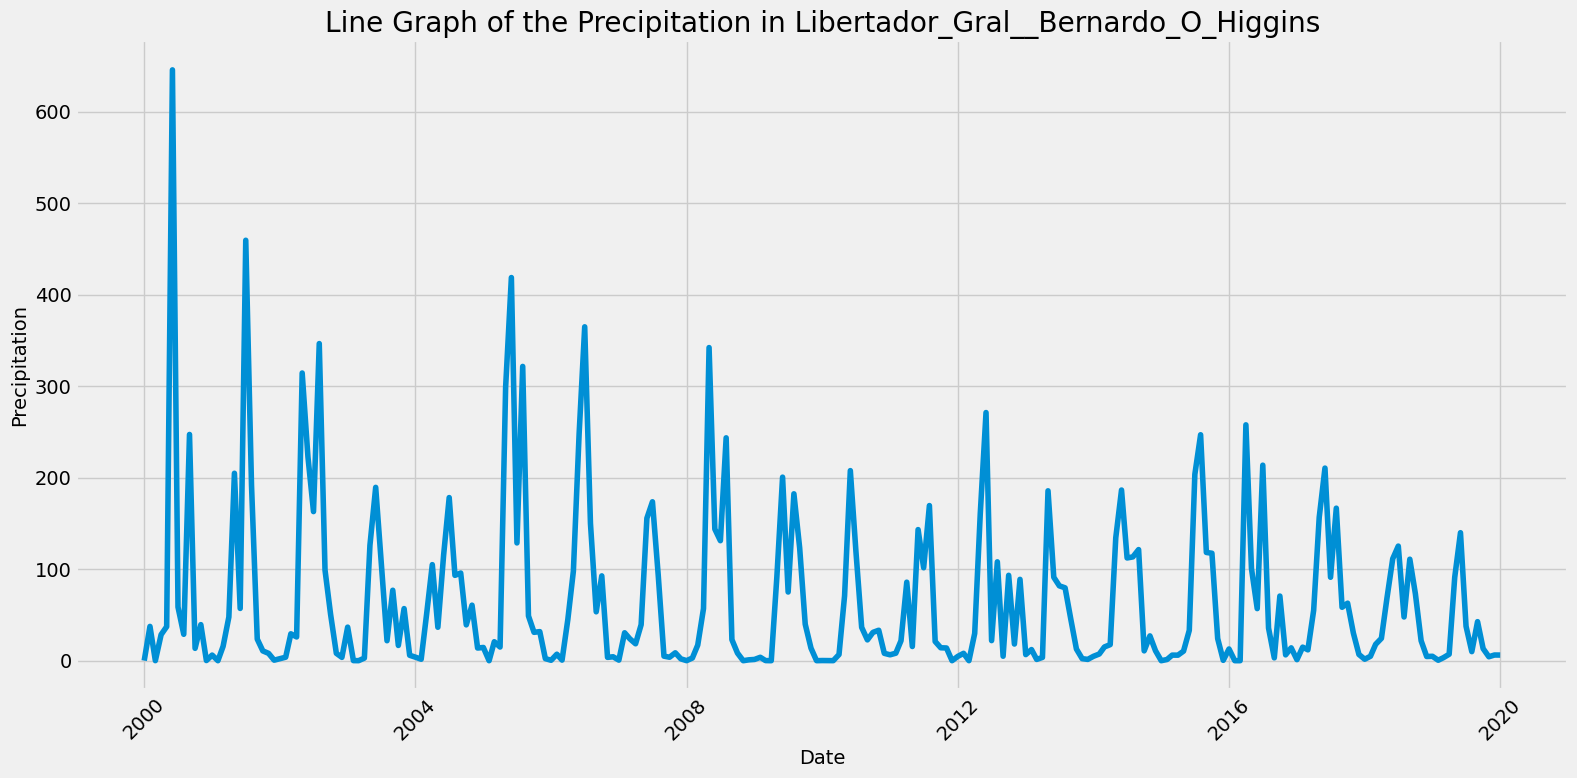

In [35]:
tempPrec, pltPrec = plot_prec_data(varClim, 'Libertador_Gral__Bernardo_O_Higgins',2000,1,2020,1)
plt.show()

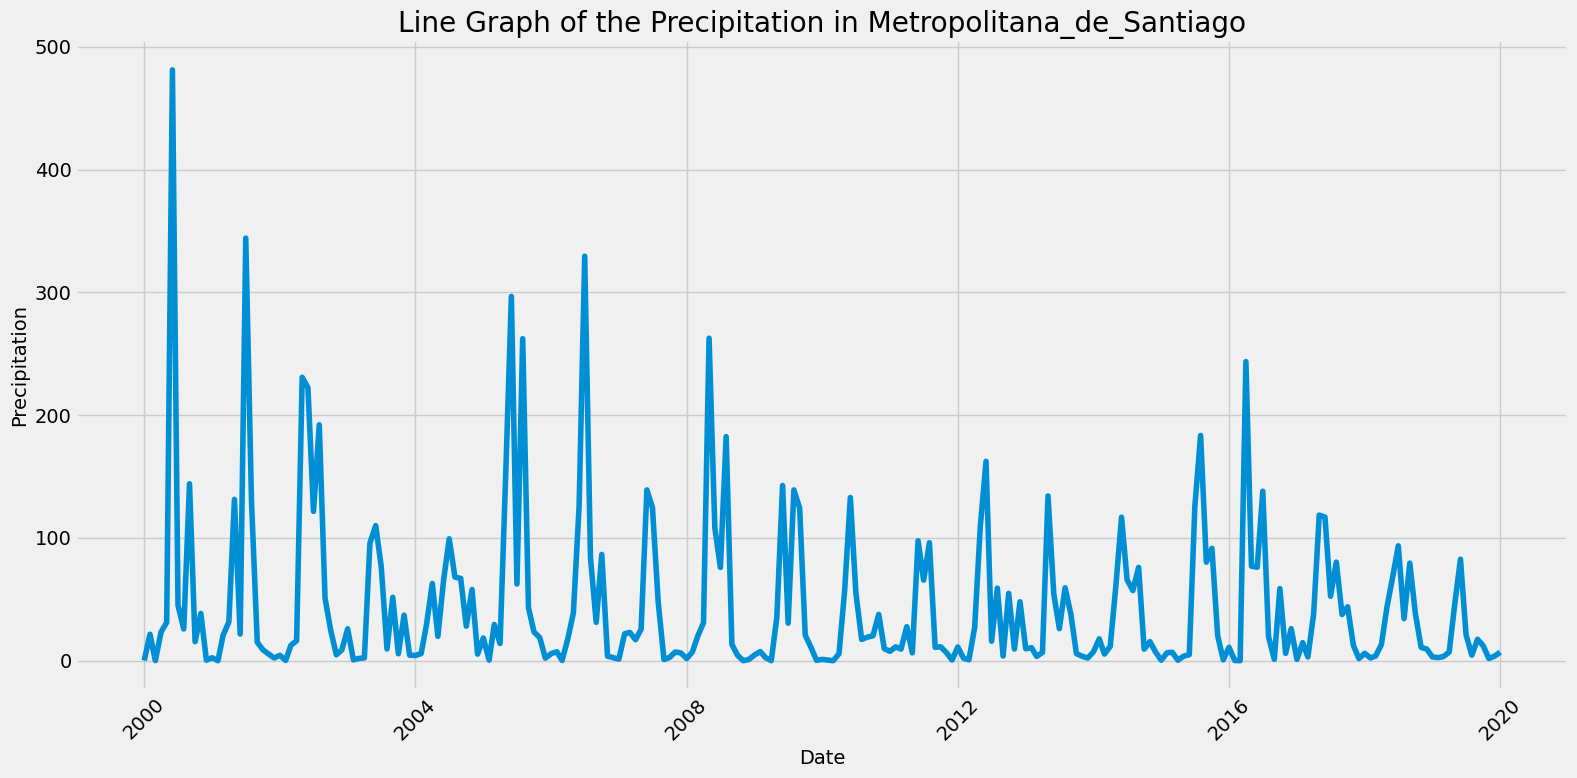

In [36]:
tempPrec2, pltPrec2 = plot_prec_data(varClim, 'Metropolitana_de_Santiago',2000,1,2020,1)
plt.show()

A time series data is stationary when it does not have a dependency on time, in other words, when there is no trend, seasonal effect, cyclicity or irregularity. 
By looking at the graph we notice that the data is not consistent over time,and there seems a trend of the precipitation values gradually decreasing over time. 

In [37]:
temp_data = tempPrec['Libertador_Gral__Bernardo_O_Higgins'].values
split = round(len(temp_data) / 2)
part1, part2 = temp_data[0:split], temp_data[split:]
mean1, mean2 = part1.mean(), part2.mean()
var1, var2 = part1.var(), part2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'variance1={var1}, variance2={var2}')

mean1=79.3333498652919, mean2=54.675902751062935
variance1=12620.161365772377, variance2=4313.2962878978315


In [38]:
temp_data = tempPrec2['Metropolitana_de_Santiago'].values
split = round(len(temp_data) / 2)
part1, part2 = temp_data[0:split], temp_data[split:]
mean1, mean2 = part1.mean(), part2.mean()
var1, var2 = part1.var(), part2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'variance1={var1}, variance2={var2}')

mean1=55.528579693155834, mean2=35.80269676854514
variance1=6782.307159091052, variance2=1974.4124026127254


When dividing the data in two and checking its mean and variance we can see that the mean and variance are very different. Having distinct values for this statistics indicates that the data is not constant over time. 

In [42]:
def plot_monthly_prec_data(data, group_name, years_list):
    '''
    This function plots pib of a determined range
    Args:
        - data: the complete dataset,
        - group_name: the region's name,
        - years_list: the list of years,
    '''
    assert (group_name in data.columns.values) , 'Not a valid region name'
    months = [month for month in data.index.strftime('%b').unique()]

    #unique colors
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years_list), replace = False)

    #plot
    fig, ax = plt.subplots()
    for index, year in enumerate(years_list): 
        ax.plot(months, data.loc[data.index.year == year , group_name], color = mycolors[index], label = year )
        ax.legend()
        ax.set_ylabel('Precipitation (mm)', fontsize=14)
        ax.set_xlabel('Month', fontsize=14)
        ax.set_title('Line Graphs of the Precipitation in '+group_name)
        ax.tick_params(axis='x', labelrotation=45)
        fig.tight_layout()



    return plt.show()

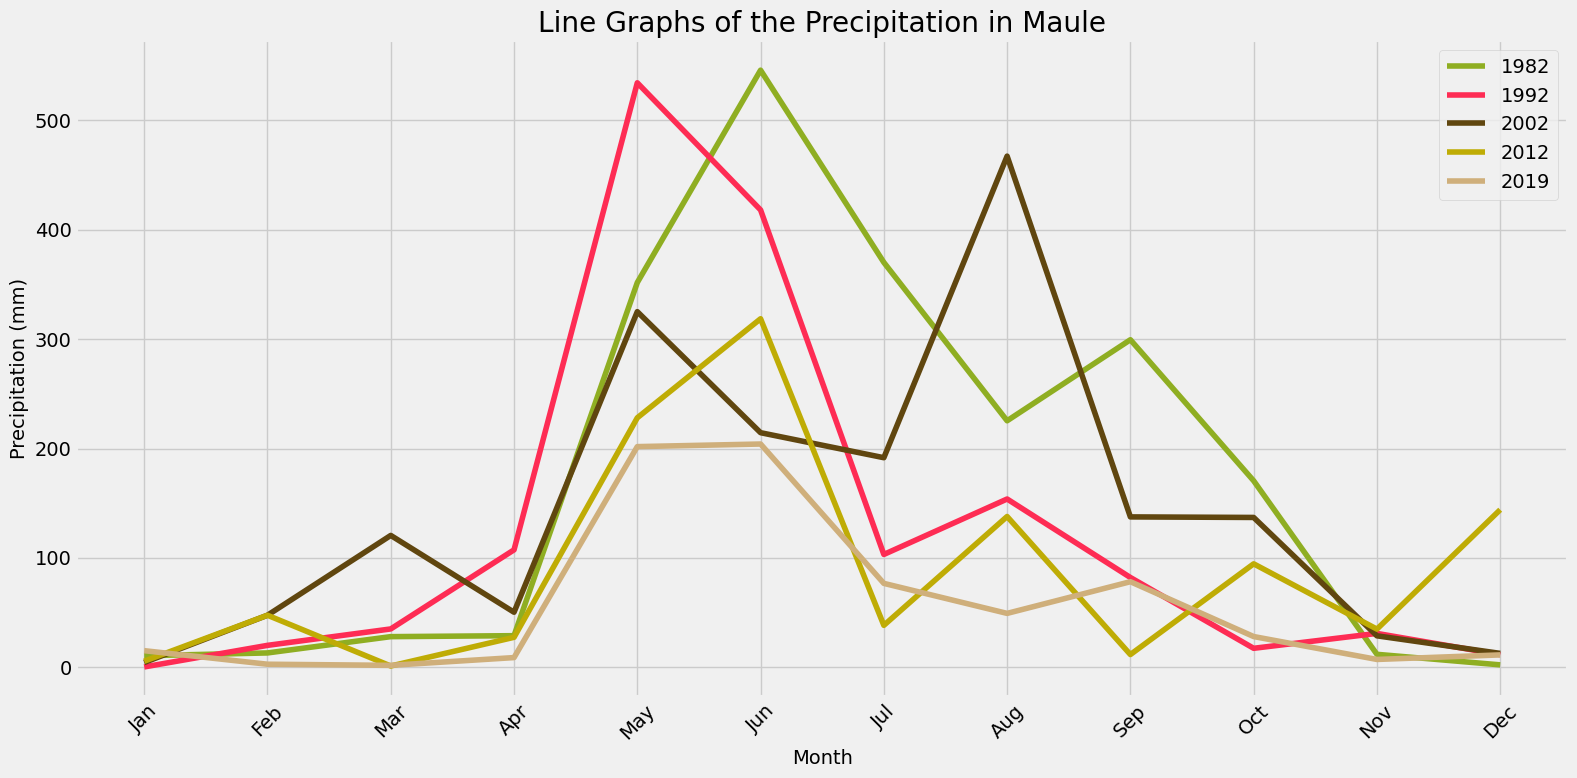

In [43]:
plot_monthly_prec_data(varClim, 'Maule', [1982,1992,2002,2012,2019])

**Multiple Years Graph Analysis** 

Overall, the graph illustrates three main insights for the behavior of precipitation for Maule's region: a decrease of the average precipitation, a decrease of precipitation coverage, and a change in the months when the maximum peak value occurred.

- In this graph, we can clearly see how the value of precipitation has decreased through the decades. At the start of the period is when the maximum value of precipitation was reported, reaching almost 550mm. This value fell from the initial decade in 1982 to the final one in 2019, where the value reached its maximum of only 200mm, a significant reduction of 63%.

- Next, the data exhibits a seasonal pattern showing that the highest values for precipitations in Maule's region commonly occurs during the second and third quarter of the year. However, we can see that the precipitation window has also been affected through the decades, ahowing a coverage of almost five months in the initial period and only covering a month for the final decade. 

- Lastly, the line graph displays a variation of the months when the precipitation was at its highest. In the first period, the maximum value was reported in June. A decade later, this peak value was found a month earlier, but this was slightly lower than the previous decade. In 2002, the peak was delayed and found until August, and the value was significantly lower than the last two decades. Once more, in 2012, this value decreased, and the decrease was the largest of the previously observed. For this decade, the maximum precipitation was found in June. Finally, for 2019 the maximum precipitation value was identified during May, where the data plateaued for a month and then decreased.


In [44]:
def plot_pib(data, group_name, initial_date_year, initial_date_month, final_date_year, final_date_month):
    '''
    This function plots pib of a determined range
    Input:
        - data: the complete dataset,
        - group_name: the column name of the pib to plot,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''
    assert (group_name in data.columns.values) and (initial_date_year in data.index.year) and (final_date_year in data.index.year), 'Choose a valid group name, initial date, and final date'

    temp = data.loc[str(initial_date_year)+'-'+str(initial_date_month)+'-1':str(final_date_year)+'-'+str(final_date_month)+'-1']
    
    fig, ax = plt.subplots()
    ax.plot(temp.index,temp[group_name])
    ax.set_ylabel('PIB', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of '+group_name)
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return None

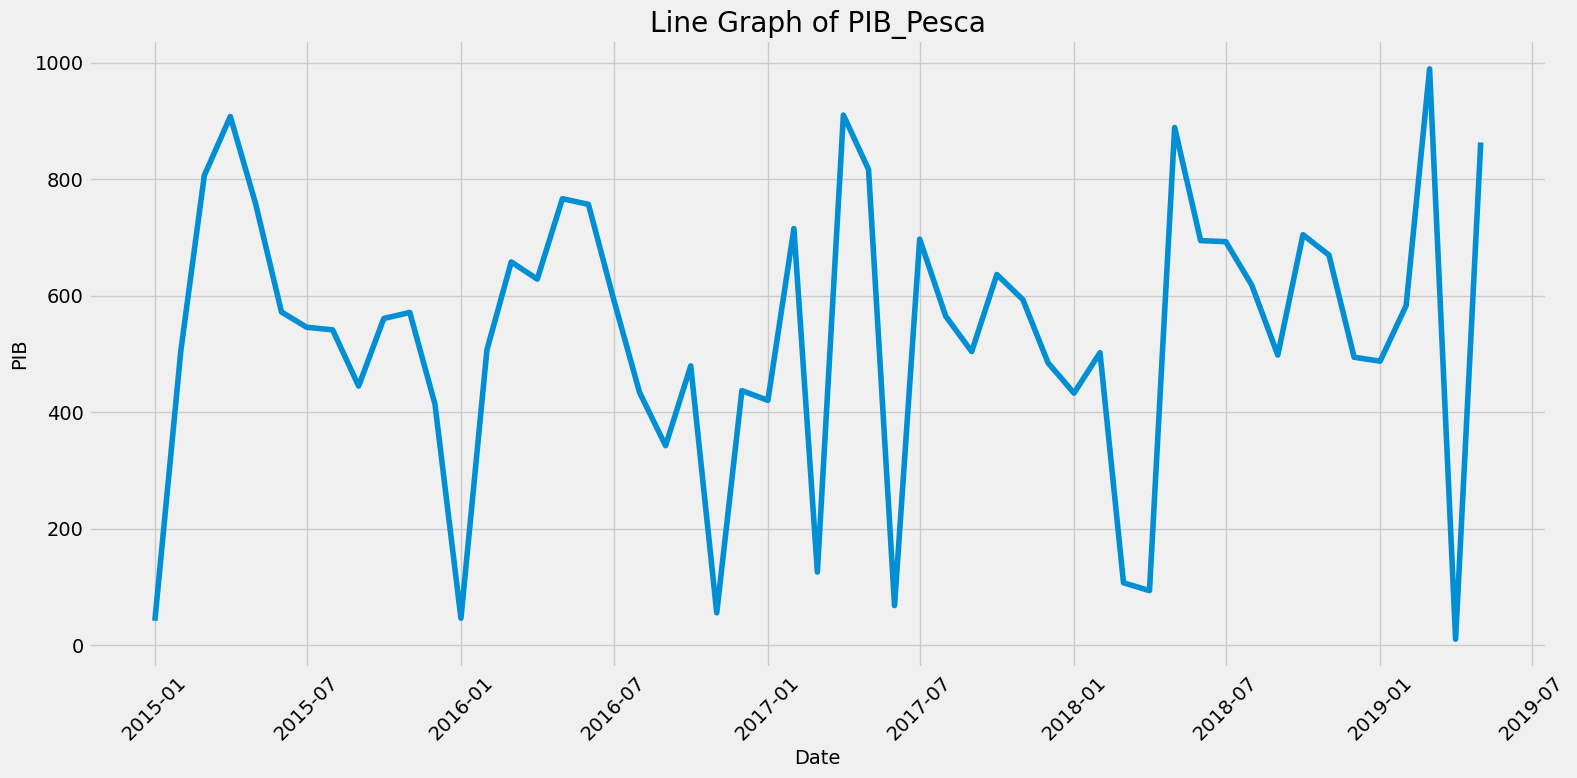

In [45]:
plot_pib(varMacr, 'PIB_Pesca', 2015, 1,2019, 5)

In [46]:
def plot_pib_agrosilva_servi(data):
    '''
    This function plots pib of a determined range
    Input:
        - data: the complete dataset,
        - group_name: the column name of the pib to plot,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''

    temp = data.loc['2013-1-1':,['PIB_Agropecuario_silvicola','PIB_Servicios_financieros']]
    
    fig, ax = plt.subplots()
    ax.plot(temp.index, temp['PIB_Agropecuario_silvicola'], label='PIB Agropecuario Silvicola')
    ax.plot(temp.index, temp['PIB_Servicios_financieros'], label='PIB Serivicios Financieros')
    ax.legend(loc='best')
    ax.set_ylabel('PIB', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of PIB')
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return None

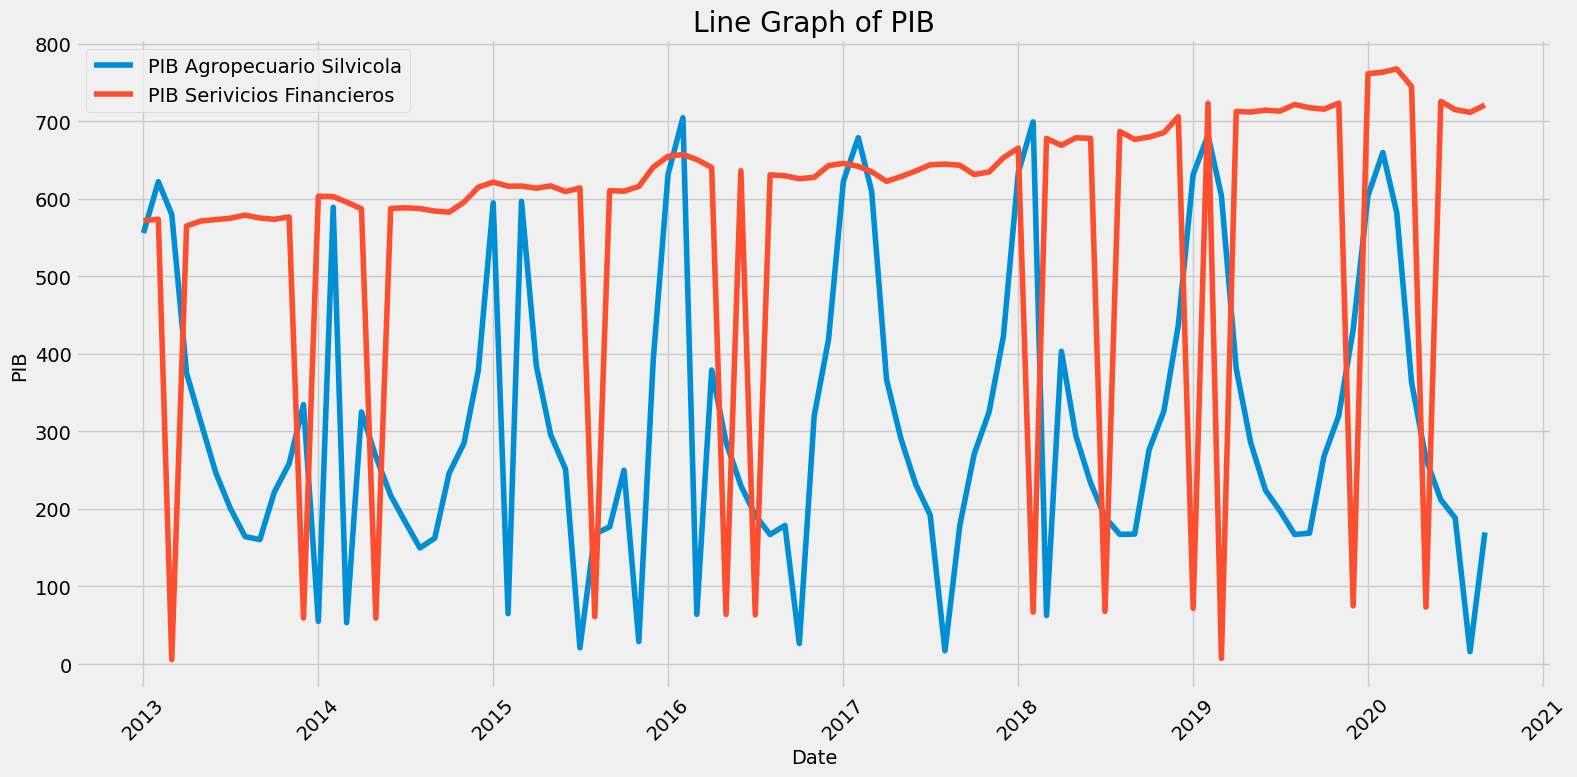

In [47]:
plot_pib_agrosilva_servi(varMacr)

**PIB Graph Analysis** 

The graph illustrates an upward trend of the financial services PIB. On the other hand, the Agropecuario Silvicola PIB semms to have a seasonality trend. Additionally, there seems to be a correlation between the two; Agropecuario Silvicola PIB's spikes match a rising strake of the financial services PIB.

### Merging the three Dataframes

Before merging the dataframes, we will add a pre-fix to the precipitations variables

In [48]:
df = precios.merge(varClim.add_prefix('precipitation_'), left_index = True, right_index = True)

In [49]:
df = df.merge(varMacr, left_index = True, right_index = True)

### Handling Missing Values

In [50]:
df.fillna(np.nan, inplace = True)

In [51]:
print('The total number of variables is:', df.shape[1])
print('The total number of rows is:', df.shape[0])

The total number of variables is: 93
The total number of rows is: 496


In [52]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[(missing_data.Percent >= 0.80)]['Total'].count()

56

In [53]:
missing_data.head(30)

,Total,Percent
No_sabe__No_responde_Miles_de_personas,492,0.991935
Indice_de_ventas_comercio_real_no_durables_IVCM,420,0.846774
Indice_de_ventas_comercio_real_IVCM,420,0.846774
Indice_de_ventas_comercio_real_durables_IVCM,420,0.846774
Indice_de_produccion_industrial_electricidad__gas_y_agua,420,0.846774
Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,410,0.826613
Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,410,0.826613
Ocupacion_en_Transporte_y_almacenamiento_INE,410,0.826613
Ocupacion_en_Informacion_y_comunicaciones_INE,410,0.826613
Ocupacion_en_Actividades_financieras_y_de_seguros_INE,410,0.826613


There were 56 columns out of 93 with more than 80% of missing data. 

Two approaches for managing the missing values: 

- Removing all variables with more than 50% of missing values.
- Removing based on year's ranges and then variables with more than 50% of missing values

#### Approach 1

In [54]:
df_1 = df.copy() 

In [55]:
frac = len(df_1) * 0.5
df_1= df_1.dropna(thresh=frac, axis=1)

In [56]:
total = df_1.isnull().sum().sort_values(ascending=False)
percent = (df_1.isnull().sum()/df_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Generacion_de_energia_electrica_CDEC_GWh,240,0.483871
Imacec_no_minero,204,0.411290
Imacec_empalmado,204,0.411290
Imacec_produccion_de_bienes,204,0.411290
Imacec_minero,204,0.411290
Imacec_industria,204,0.411290
Imacec_resto_de_bienes,204,0.411290
Imacec_servicios,204,0.411290
Imacec_a_costo_de_factores,204,0.411290
Imacec_comercio,204,0.411290


In [57]:
print('The total number of variables is:', df_1.shape[1])
print('The total number of rows is:', df_1.shape[0])

The total number of variables is: 29
The total number of rows is: 496


In [58]:
df_1.columns

Index(['Precio_leche', 'precipitation_Coquimbo', 'precipitation_Valparaiso',
       'precipitation_Metropolitana_de_Santiago',
       'precipitation_Libertador_Gral__Bernardo_O_Higgins',
       'precipitation_Maule', 'precipitation_Biobio',
       'precipitation_La_Araucania', 'precipitation_Los_Rios',
       'Imacec_empalmado', 'Imacec_produccion_de_bienes', 'Imacec_minero',
       'Imacec_industria', 'Imacec_resto_de_bienes', 'Imacec_comercio',
       'Imacec_servicios', 'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'Precio_del_petroleo_WTI_dolaresbarril',
       'Tipo_de_cambio_del_dolar_observado_diario',
       'Tipo_de_cambio_nominal_multilateral___TCM',
       'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100',
       'Indice_de_produccion_industrial__mineria',


#### Approach 2

When taking a look at the date it was identified that there are many missing data, we could reduce this by removing data from very old years. Hence more value could be obtained from the variables instead of removing them to keep more dates. 

In [59]:
missing = df.isnull().groupby(df.index.year // 5 * 5).sum().sum(axis = 1)
percent = missing/ missing.sum()
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Date,,
1975,960,0.033951
1980,4751,0.168022
1985,4632,0.163814
1990,4512,0.159570
1995,3996,0.141321
2000,3660,0.129438
2005,3573,0.126362
2010,2132,0.075400
2015,60,0.002122


The years that are dropped are those before 1995.

In [60]:
df = df.loc[df.index.year > 1995]

In [61]:
missing = df.isnull().groupby(df.index.year // 5 * 5).sum().sum(axis = 1)
percent = missing/ missing.sum()
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Date,,
1995,3108,0.247985
2000,3660,0.292029
2005,3573,0.285087
2010,2132,0.170111
2015,60,0.004787
2020,0,0.000000


In [62]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[:10]

,Total,Percent
No_sabe__No_responde_Miles_de_personas,288,0.986301
Indice_de_ventas_comercio_real_no_durables_IVCM,216,0.739726
Indice_de_ventas_comercio_real_IVCM,216,0.739726
Indice_de_ventas_comercio_real_durables_IVCM,216,0.739726
Indice_de_produccion_industrial_electricidad__gas_y_agua,216,0.739726
Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,206,0.705479
Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,206,0.705479
Ocupacion_en_Transporte_y_almacenamiento_INE,206,0.705479
Ocupacion_en_Informacion_y_comunicaciones_INE,206,0.705479
Ocupacion_en_Actividades_financieras_y_de_seguros_INE,206,0.705479


In [63]:
frac = len(df) * 0.5
df= df.dropna(thresh=frac, axis=1)

In [64]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[(missing_data.Percent >= 0.50)]['Total'].count()

0

In [65]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Precio_del_propano_centavos_de_dolargalon_DTN,144,0.493151
Precio_del_diesel_centavos_de_dolargalon,129,0.441781
Precio_del_petroleo_Brent_dolaresbarril,48,0.164384
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,48,0.164384
Precio_del_kerosene_dolaresm3,48,0.164384
Generacion_de_energia_electrica_CDEC_GWh,36,0.123288
precipitation_Libertador_Gral__Bernardo_O_Higgins,0,0.000000
precipitation_Maule,0,0.000000
precipitation_Metropolitana_de_Santiago,0,0.000000
Imacec_resto_de_bienes,0,0.000000


There are still 6 variables with missing values.

In [66]:
print('The total number of variables is:', df.shape[1])
print('The total number of rows is:', df.shape[0])

The total number of variables is: 34
The total number of rows is: 292


In [67]:
df.columns

Index(['Precio_leche', 'precipitation_Coquimbo', 'precipitation_Valparaiso',
       'precipitation_Metropolitana_de_Santiago',
       'precipitation_Libertador_Gral__Bernardo_O_Higgins',
       'precipitation_Maule', 'precipitation_Biobio',
       'precipitation_La_Araucania', 'precipitation_Los_Rios',
       'Imacec_empalmado', 'Imacec_produccion_de_bienes', 'Imacec_minero',
       'Imacec_industria', 'Imacec_resto_de_bienes', 'Imacec_comercio',
       'Imacec_servicios', 'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'Precio_del_diesel_centavos_de_dolargalon',
       'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
       'Precio_del_petroleo_Brent_dolaresbarril',
       'Precio_del_kerosene_dolaresm3',
       'Precio_del_petroleo_WTI_dolaresbarril',

### Missing Value Imputation

To deal with missing values in time series we can perform different approaches. In this analysis we have filled the missing values using the mean of nearest neighbors. For this we used the machine learning technique of KNN with 3 nearest neighbors. 

In [68]:
from fancyimpute import KNN

In [69]:
df_knn1 = df_1.copy()
df_knn = df.copy()


In [70]:
df_knn.isna().sum().sort_values(ascending=False)

Precio_del_propano_centavos_de_dolargalon_DTN                           144
Precio_del_diesel_centavos_de_dolargalon                                129
Precio_del_petroleo_Brent_dolaresbarril                                  48
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas     48
Precio_del_kerosene_dolaresm3                                            48
Generacion_de_energia_electrica_CDEC_GWh                                 36
precipitation_Libertador_Gral__Bernardo_O_Higgins                         0
precipitation_Maule                                                       0
precipitation_Metropolitana_de_Santiago                                   0
Imacec_resto_de_bienes                                                    0
precipitation_Valparaiso                                                  0
precipitation_Coquimbo                                                    0
precipitation_Biobio                                                      0
precipitatio

In [71]:
#Create Imputer
imputer = KNN()
# Impute 
df_knn.iloc[:,:] = np.round(imputer.fit_transform(df))

Imputing row 1/292 with 6 missing, elapsed time: 0.035
Imputing row 101/292 with 2 missing, elapsed time: 0.049
Imputing row 201/292 with 0 missing, elapsed time: 0.052


In [72]:
total = df_knn.isnull().sum().sort_values(ascending=False)
percent = (df_knn.isnull().sum()/df_knn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Generacion_de_energia_electrica_CDEC_GWh,0,0.0
precipitation_Los_Rios,0,0.0
Imacec_comercio,0,0.0
Imacec_resto_de_bienes,0,0.0
Imacec_industria,0,0.0
Imacec_minero,0,0.0
Imacec_produccion_de_bienes,0,0.0
Imacec_empalmado,0,0.0
precipitation_La_Araucania,0,0.0
Indice_de_produccion_industrial__manufacturera,0,0.0


In [73]:
df_knn1.isna().sum().sort_values(ascending=False)

Generacion_de_energia_electrica_CDEC_GWh                 240
Imacec_no_minero                                         204
Imacec_empalmado                                         204
Imacec_produccion_de_bienes                              204
Imacec_minero                                            204
Imacec_industria                                         204
Imacec_resto_de_bienes                                   204
Imacec_servicios                                         204
Imacec_a_costo_de_factores                               204
Imacec_comercio                                          204
Tipo_de_cambio_nominal_multilateral___TCM                192
Indice_de_produccion_industrial__manufacturera           144
Indice_de_produccion_industrial__mineria                 132
Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100     84
Precio_del_petroleo_WTI_dolaresbarril                     52
Tipo_de_cambio_del_dolar_observado_diario                 43
precipitation_Biobio    

In [74]:
#Create Imputer
imputer2 = KNN()
# Impute 
df_knn1.iloc[:,:] = np.round(imputer.fit_transform(df_1))

Imputing row 1/496 with 16 missing, elapsed time: 0.102
Imputing row 101/496 with 13 missing, elapsed time: 0.139
Imputing row 201/496 with 10 missing, elapsed time: 0.164
Imputing row 301/496 with 0 missing, elapsed time: 0.168
Imputing row 401/496 with 0 missing, elapsed time: 0.169


In [75]:
total = df_knn1.isnull().sum().sort_values(ascending=False)
percent = (df_knn1.isnull().sum()/df_knn1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Generacion_de_energia_electrica_CDEC_GWh,0,0.0
Imacec_resto_de_bienes,0,0.0
precipitation_Coquimbo,0,0.0
precipitation_Valparaiso,0,0.0
precipitation_Metropolitana_de_Santiago,0,0.0
precipitation_Libertador_Gral__Bernardo_O_Higgins,0,0.0
precipitation_Maule,0,0.0
precipitation_Biobio,0,0.0
precipitation_La_Araucania,0,0.0
precipitation_Los_Rios,0,0.0


In [76]:
df_1 = df_knn1.copy()
df = df_knn.copy()

## Feature Engineering

### Differencing

We want to know whether variations in one time series are correlated with variations in another. For this, the autocorrelation of the variables must be constant over time, so we require stationary data. To ensure stationarity we will apply the differencing method. 

A way to determine stationarity is with a statistical test called "Unit Root Test". In this analysis we will use the most commonly used of these tests, the Augmented Dickey Fuller test (ADH Test). The null hypothesis states that the data is non-stationay. 

In [79]:
def check_stationarity(data, verbose = True):
    result = adfuller(np.array(data))
    if verbose != False:
        print('ADF Statistic: '+str(result[0]))
        print('p-value: '+str(result[1]))
    return result[1]

In [77]:
def differencing(data):
    non_stationary_data = []
    for var in data.columns:
        print(f'Variable: {var}')
        data[var] = data[var] - data[var].shift(1)
        # Fill missing values with a forward fill method
        data[var].fillna(method='bfill', inplace=True)
        #testing for stationarity
        pv = check_stationarity(data[var], verbose = False)
        if pv > 0.05:
            print('Non-stationary data')
            non_stationary_data.append(var)
    print(non_stationary_data)
    return data
    

In [78]:
diff_data = differencing(df)

Variable: Precio_leche
ADF Statistic: -4.722764411265753
p-value: 7.624559909039014e-05
Variable: precipitation_Coquimbo
ADF Statistic: -10.138291033627286
p-value: 8.553241604547365e-18
Variable: precipitation_Valparaiso
ADF Statistic: -11.424984664291385
p-value: 6.729640409678796e-21
Variable: precipitation_Metropolitana_de_Santiago
ADF Statistic: -11.85883959834891
p-value: 6.923867081658366e-22
Variable: precipitation_Libertador_Gral__Bernardo_O_Higgins
ADF Statistic: -12.641475719542024
p-value: 1.4317987622765502e-23
Variable: precipitation_Maule
ADF Statistic: -13.626592480884934
p-value: 1.755366790956669e-25
Variable: precipitation_Biobio
ADF Statistic: -9.926416864677826
p-value: 2.898965093001882e-17
Variable: precipitation_La_Araucania
ADF Statistic: -13.824024306864537
p-value: 7.809660903913173e-26
Variable: precipitation_Los_Rios
ADF Statistic: -13.551506191171358
p-value: 2.404439066906129e-25
Variable: Imacec_empalmado
ADF Statistic: -7.042362114476025
p-value: 5.8025

The p-value in all are variables is small,  there is enough statistical evidence to  reject the Ho with a significance level of less than 5% . Hence the test shows the data as stationary.

### Handling Outliers

We can see that most of the variables have extreme values, however there is one in particular that presents large outliers that can affect our analysis. To reduce the reduce of including noise with this variable, we will treat it with winsorization

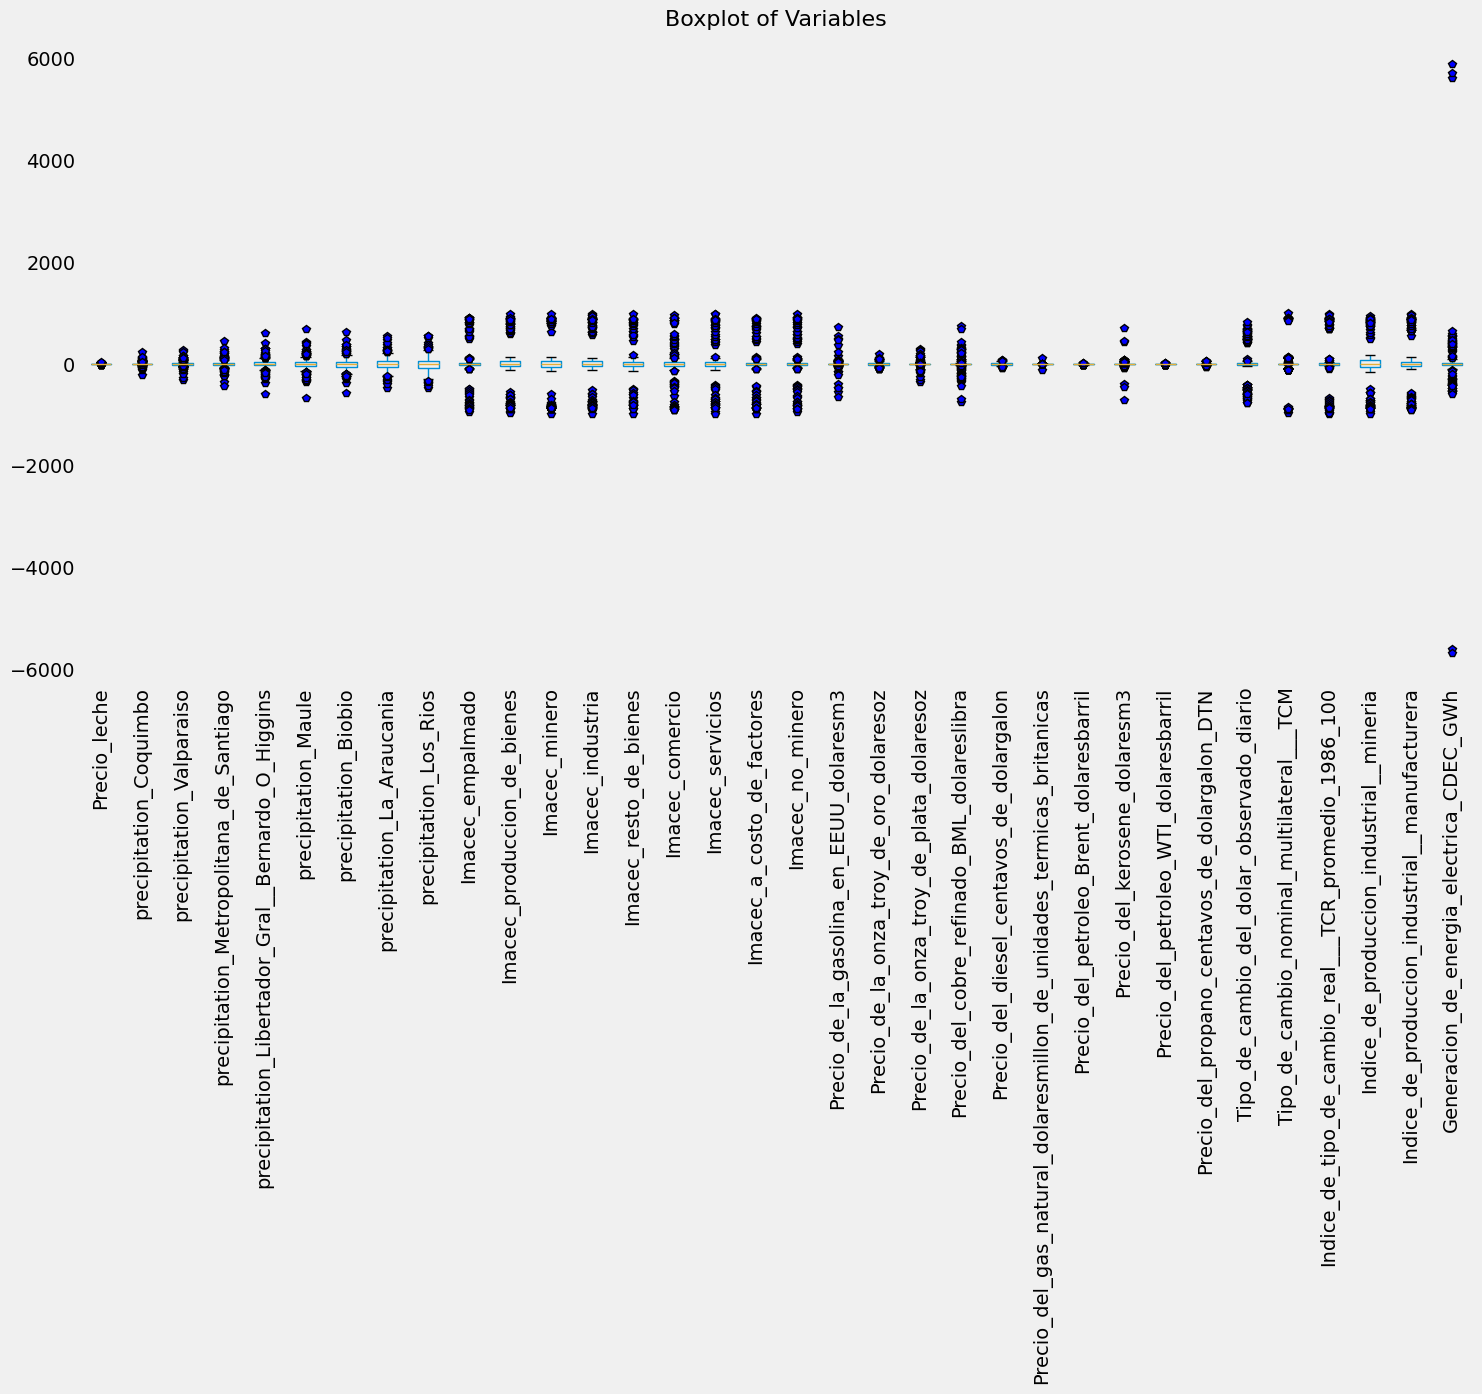

In [83]:
boxplot = df.boxplot(grid = False, flierprops = bit)
plt.title('Boxplot of Variables', fontsize = 16)
plt.tick_params(axis='x', labelrotation=90)

In [86]:
df['Generacion_de_energia_electrica_CDEC_GWh'] = winsorize(df['Generacion_de_energia_electrica_CDEC_GWh'], limits = [0.05,0.05])

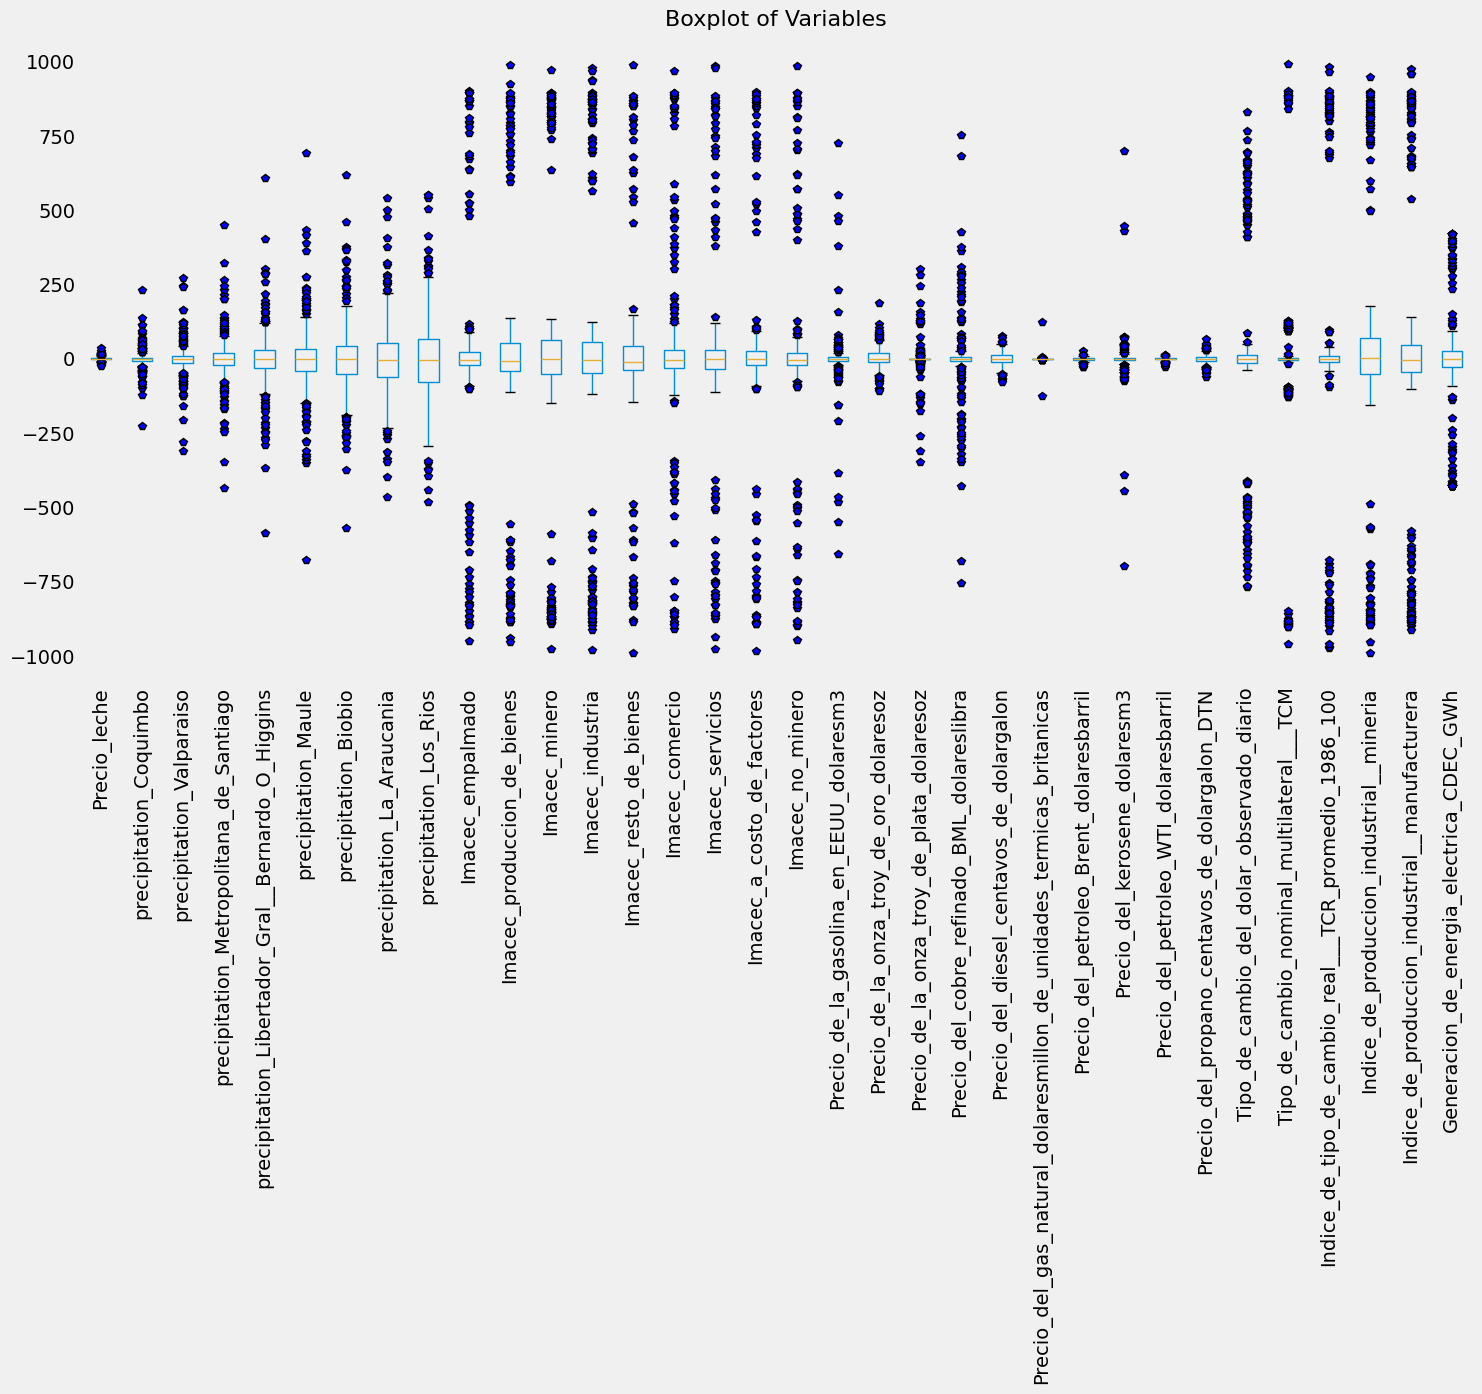

In [89]:
boxplot = df.boxplot(grid = False, flierprops = bit)
plt.title('Boxplot of Variables', fontsize = 16)
plt.tick_params(axis='x', labelrotation=90)

### Correlation Analysis

 To determine the method for conducting a correlation analysis we need to check for the normality distribution of the variables. For this we will use the Shapiro-Wilks Test.

In [98]:
def test_SW(data):
    count = 0
    for var in data.columns:
        print(f'Variable: {var}')
        pv = shapiro(df[var])[0]
        print(pv)
        if pv < 0.05:
            count +=1
            print('H0 ( samples comes from a normal distribution) can be rejected')
    return f'{count} variables are not normally distributed'
    

In [99]:
test_SW(df)

Variable: Precio_leche
0.904438853263855
Variable: precipitation_Coquimbo
0.7575962543487549
Variable: precipitation_Valparaiso
0.8066531419754028
Variable: precipitation_Metropolitana_de_Santiago
0.8141484260559082
Variable: precipitation_Libertador_Gral__Bernardo_O_Higgins
0.848321795463562
Variable: precipitation_Maule
0.8711434006690979
Variable: precipitation_Biobio
0.9286277294158936
Variable: precipitation_La_Araucania
0.9456323385238647
Variable: precipitation_Los_Rios
0.9607124328613281
Variable: Imacec_empalmado
0.6835811138153076
Variable: Imacec_produccion_de_bienes
0.7770402431488037
Variable: Imacec_minero
0.8197926878929138
Variable: Imacec_industria
0.822918713092804
Variable: Imacec_resto_de_bienes
0.7169713973999023
Variable: Imacec_comercio
0.7449085712432861
Variable: Imacec_servicios
0.7402709722518921
Variable: Imacec_a_costo_de_factores
0.6912496089935303
Variable: Imacec_no_minero
0.6897367835044861
Variable: Precio_de_la_gasolina_en_EEUU_dolaresm3
0.42523902654

'0 are not normally distributed'

/Users/dannygc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


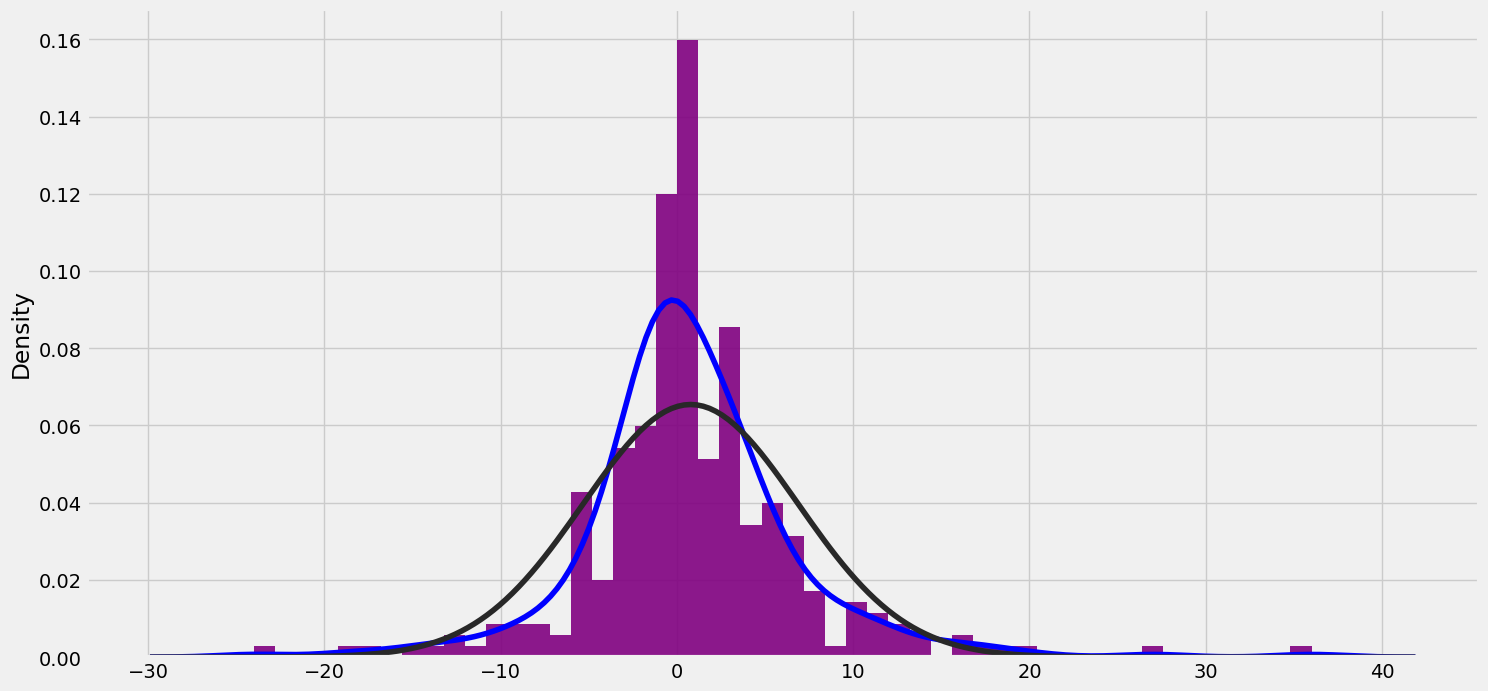

In [101]:
sns.distplot(x = df['Precio_leche'], fit = norm, kde = True, bins = 50, color = 'b', hist_kws = {'color':'purple', 'alpha':0.9})

Since all variables seem to have a normal distribution, we will proceed with a pearson method to evaluate correlation.

### Standarization of  the Data

## Modelling 

We want to fit data to a time series model and make use of the model to make forecast for the future. 